## Tarea 2 - Miguel Raz

## Ejercicio 1

Consideraren la siguiente definición de la derivada, que podemos llamar
*derivada de paso complejo*:

$$
f^\prime(x_0) \equiv \lim_{h\to 0} \textrm{Im}\left(\frac{f(x_0+i h)}{h}\right),
$$

donde 

* $i^2 = -1$, 
* $\textrm{Im}(z)$ es la parte imaginaria de $z$.

1. Estudien el comportamiento del error de la derivada de paso complejo, como
lo hicimos en clase, simulando el límite $h→0$.

2. Expliquen analíticamente los resultados numéricos obtenidos.


NOTA: En caso de que se atoren, o que el tema les interese más, ver
[este artículo](https://epubs.siam.org/doi/epdf/10.1137/S003614459631241X)
y/o [esta liga](https://nhigham.com/2020/10/06/what-is-the-complex-step-approximation/).



In [1]:
f1(f, x, h) = (f(x + h) - f(x - h))/(2h)
f2(f, x, h) = imag(f(x + im*h))/h
f(x) = exp(x)
x_0 = 1.0

1.0

In [2]:
hs = logrange(1e-4, 1e-12, 1000) |> collect;
# Tomamos los valores absolutos de los errores relativos:
y1s = abs.((f1.(f, x_0, hs) .- f(x_0)) ./ f(x_0));
y2s = abs.((f2.(f, x_0, hs) .- f(x_0)) ./ f(x_0));
ticks = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

9-element Vector{Float64}:
 0.0001
 1.0e-5
 1.0e-6
 1.0e-7
 1.0e-8
 1.0e-9
 1.0e-10
 1.0e-11
 1.0e-12

In [3]:
using Plots

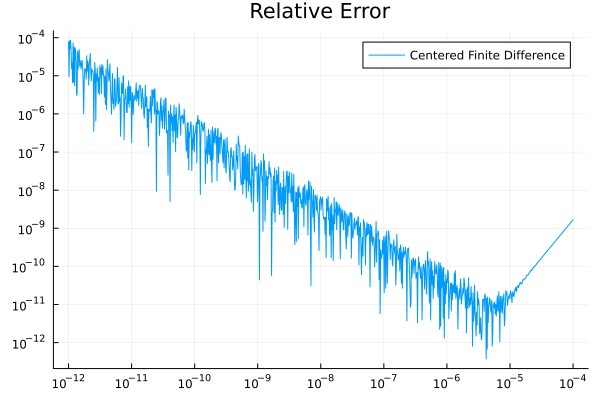

In [4]:
p = Plots.plot(hs, y1s, xaxis = :log10, yaxis = :log10, label = "Centered Finite Difference", xticks = ticks, yticks = ticks, title = "Relative Error")

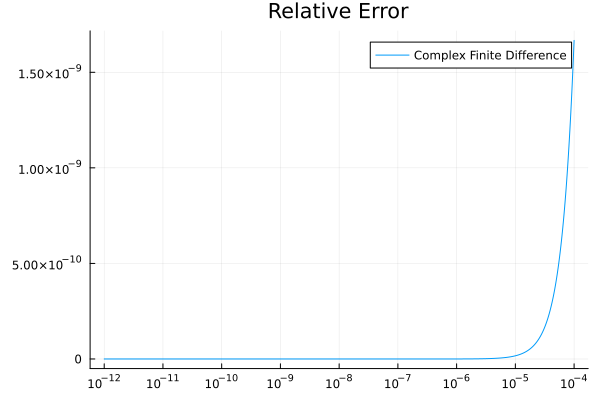

In [5]:
p2 = Plots.plot(hs, y2s, label = "Complex Finite Difference", xaxis = :log10, xticks = ticks, title = "Relative Error")

## Ejercicio 2

 - A partir de $\mathbb{D}_{x_0}u \cdot \mathbb{D}_{x_0}w$, obtengan la expresión para
 $\mathbb{D}_{x_0}z = \mathbb{D}_{x_0}u / \mathbb{D}_{x_0}w$. Es decir, demuestren
 el resultado obtenido para la división de duales.



Lema:


* $\mathbb{D}_{x_0} (u \cdot w) = \mathbb{D}_{x_0} u \cdot \mathbb{D}_{x_0} w = \big( u_0 w_0,\, u_0 w'_0 +  w_0 u'_0 \big)$



Demostracion:

* $\mathbb{D}_{x_0}z = \mathbb{D}_{x_0}u / \mathbb{D}_{x_0}w$
* $\mathbb{D}_{x_0}z \cdot \mathbb{D}_{x_0}w= \mathbb{D}_{x_0}u $
* $\big(z_0 w_0, z_0 w_0\prime + z_0 w_0\prime \big) = \mathbb{D}_{x_0}u$


## Ejercicio 3

 - Definan una estructura en Julia `Dual` que represente a los números duales;
 los nombres de los campos internos serán `fun` y `der`.
 Por sencillez, pueden considerar que los campos de `Dual` son del tipo `Float64`,
 aunque pueden *osar* y atreverse a implementar el caso paramétrico `Dual{T <: Real}`,
 donde `T` es el tipo de *ambos* campos.

 - Sobrecarguen las operaciones de tal manera que las cuatro operaciones aritméticas
 que involucran dos `Dual`es, den el resultado que se espera.

 - Definan un método específico para crear duales (constructor externo), a partir de
 un sólo valor (en lugar de los dos requeridos), y que corresponderá a
 $\mathbb{D}_{x_0}c = (c, 0)$, donde $c$ es una constante (real).

 - Extiendan los métodos que permitan sumar/restar y multiplicar/dividir un
 número (`::Real`) y un `::Dual`. (Recuerden que ciertas operaciones son conmutativas!).
 NOTA: Este ejercicio lo pueden hacer escribiendo todos los métodos, uno a uno. Otra
 opción es usar `promote` y `convert` para definir reglas de promoción y conversión;
 [la documentación](https://docs.julialang.org/en/v1/manual/conversion-and-promotion/)
 tiene más información, por si este camino les interesa.

 - Definan las funciones `fun` y `der` que, al ser aplicadas a un `Dual` devuelvan
 la parte que corresponde a la función y la parte que corresponde a la derivada
 del `Dual`, respectivamente.

 - Incluyan varios casos (propuestos por ustedes mismos) donde se *compruebe*
 que lo que
 implementaron da el resultado que debería ser. Para esto, pueden usar la librería
 estándard [`Test`](https://docs.julialang.org/en/v1/stdlib/Test/) de Julia.



In [6]:
struct Dual
    fun::Float64
    der::Float64
end

Base.:+(x::Dual, y::Dual) = Dual(x.fun + y.fun, x.der + y.der)
Base.:-(x::Dual, y::Dual) = Dual(x.fun + y.fun, x.der - y.der)
Base.:*(x::Dual, y::Dual) = Dual(x.fun * y.fun, x.der * y.fun + x.fun * y.der)
Base.:/(x::Dual, y::Dual) = Dual(x.fun / y.fun, (x.der - (x.fun / y.fun) * y.der) / y.fun)
Base.:^(x::Dual, y::Float64) = Dual(x.fun ^ y, y* x.fun^(y-1) * x.der)

Base.:^(x::Dual, y::Int64) = x ^ Float64(y)
Base.:+(x::Dual, y::Int64) = x + Dual(Float64(y))
Base.:-(x::Dual, y::Int64) = x - Dual(Float64(y))
Base.:*(x::Dual, y::Int64) = x * Dual(Float64(y))
Base.:/(x::Dual, y::Int64) = x / Dual(Float64(y))
Dual(x::Float64) = Dual(x, 0.0)
fun(x::Dual) = x.fun
der(x::Dual) = x.der

Base.:+(x::Dual, y::Float64) = x + Dual(y, 0)
Base.:+(x::Float64, y::Dual) = Dual(x, 0) + y
Base.:-(x::Dual, y::Float64) = x - Dual(y, 0)
Base.:-(x::Float64, y::Dual) = Dual(x) - y
Base.:*(x::Dual, y::Float64) = x * Dual(y, 0)
Base.:*(x::Float64, y::Dual) = Dual(x) * y
# 3x
Base.:*(x::Int, y::Dual) = Dual(x, 0) * y
Base.:/(x::Dual, y::Float64) = x / Dual(y, 0)
Base.:/(x::Float64, y::Dual) = Dual(x) / y

In [7]:
Dual(1,1) + Dual(2, 0)

Dual(3.0, 1.0)

In [8]:
Dual(2, 1) * Dual(3, 0) - Dual(1, 0)


Dual(7.0, 3.0)

In [9]:
fun(Dual(7.0)) == 7.0

true

In [10]:
# -1/25^2
((Dual(5,1) + Dual(1.0, 0))) / (Dual(5.0, 1))

Dual(1.2, -0.039999999999999994)

In [11]:
Dual(9.0, 1)^2.0 / (Dual(9.0, 1) + Dual(1.0, 0.0))

Dual(8.1, 0.99)

In [12]:
# D((5x + 1)(x + 1)) == 10x + 6 -> 
(Dual(5, 1) + Dual(1.0, 0.0)) #* (Dual(1.0, 1.0) + Dual(1.0,0.0))
(Dual(5, 1) + Dual(1.0, 0.0))* (Dual(1.0))

Dual(6.0, 1.0)

## Ejercicio 4

 Definan una nueva función `dual(x_0)` cuyo resultado sea un `Dual` que corresponde
 a la variable independiente $x$ evaluada en `x_0`. Con esta función
 obtengan $g'(2)$ para la función
 $$
 g(x) = \frac{3x^2-8x+1}{7x^3-1}.
 $$


In [13]:
g(x::Float64) = let x = Dual(x, 1)
    #(3x^2 - 8.0x + 1.0) / (7.0x^3 - 1.0)
    #3.0x^2 - 8.0x + 1.0 / (x + 1.0)
    (3x^2 - 8x + 1) /  (7x^3 - 1)
end
g(2.0)
# Wolfram dice g′(2) ≈ 0.156033
#
g′(x) = (-21x^4 + 112x^3 - 21x^2 - 6x + 8)/(7x^3 - 1)^2
(g(2.0), g′(2.0))


(Dual(0.5087719298245614, -0.6795937211449676), 0.15603305785123966)

## Ejercicio 5

 - A partir de lo visto en clase, *extiendan* las funciones `sin(a::Dual)`,
 `cos(a::Dual)`, `tan(a::Dual)`, `^(a::Dual, n::Int)`, `sqrt(a::Dual)`, `exp(a::Dual)`
 y `log(a::Dual)`, al igual que `a^n`, con `a::Dual` y `n::Int`.

 - Al igual que antes, construyan algún conjunto de pruebas que muestre, de manera
 sencilla, que lo que hicieron da lo que uno esperaría obtener.


In [24]:
import Base: sin, cos, tan, ^, sqrt, exp, log
Base.sin(x::Dual) = Dual(sin(x.fun), cos(x.der))
Base.cos(x::Dual) = Dual(cos(x.fun), -sin(x.der))
Base.tan(x::Dual) = Dual(tan(x.fun), -sec(x.der)^2)
Base.:^(x::Dual, n::Int) = x^Float64(n)
Base.sqrt(x::Dual) = Dual(sqrt(x.fun), 1/sqrt(x.der))
Base.exp(x::Dual) = Dual(exp(x.fun), x.der * x.fun)
Base.log(x::Dual) = Dual(log(x.fun), 1/x.der)

In [25]:
d = Dual(Float64(pi))
sin(d)

Dual(1.2246467991473532e-16, 1.0)

In [26]:
cos(d)

Dual(-1.0, -0.0)

In [27]:
tan(d)

Dual(-1.2246467991473532e-16, -1.0)

In [28]:
d2 = Dual(9.0, 1.0)
sqrt(d2)

Dual(3.0, 1.0)

In [29]:
d3 = Dual(log(2))
exp(d3)

Dual(2.0, 0.0)

In [32]:
d4 = Dual(5, 1) + Dual(5, 2)
log(d4)

Dual(2.302585092994046, 0.3333333333333333)